In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 3 on probability from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts.
</span>

You can find the corresponding post [here]() on my blog.

# Introduction

We have studied the basics of probability in [the last post]()/[notebook]() based on Chapters 3.1 to 3.3 of the Deep Learning Book. We have seen what is a random variable to probability mass function and probability density function. The goal was also to gain more intuition for very used tools like derivatives, area under the curve and integrals.

This second post/notebook is on marginal and conditional probability, the chain rule and the concept of independence. We will also cover the notion of variance and covariance. All of this content corresponds to chapters 3.4 to 3.8.

# 3.4 Marginal Probability

In the preceding examples, we have mainly seen probability for one random variable at a time. Except in the case of joint probability, In some cases, it can be indeed interested to see the probabilities of multiple events at the same time.

$P(\text{x}=x, \text{y}=y)$ refers to the **joint probability** (cf. [previous blog/notebook]()): this is the probability that $\text{x}$ takes the specific value $x$ **and** that $\text{y}$ takes the specific value $y$.

### Example

In this example, we'll tackle the problem backward. Let's say that we toss a coin and throw a die. We look at the probability of each event and see for instance that there the probability to get a $1$ is $\frac{1}{6}$ or the probability to get a `heads` is $\frac{1}{2}$. Let's write these probabilities:

<img src="images/marginal-probabilities-empty.png" width="600" alt="Probabilities of two events. Marginal probabilities corresponds to the single event probabilities" title="Marginal probability. The probabilities of two events (tossing a coin and throwing a die) are represented.">
<em>The probabilities of two events (tossing a coin and throwing a die) are represented individually.</em>

I was saying that we take the problem backward here because they are actually the marginal probabilities. So what are the other probabilities? They are the joint probabilities. It is the probability to get two specific outcomes in our experiment and it can be wrote inside the table:

<img src="images/marginal-probabilities.png" width="600" alt="Probabilities of two events. Marginal probabilities corresponds to the single event probabilities" title="Marginal probability. The probabilities of two events (tossing a coin and throwing a die) are represented.">
<em>Marginal probability. The probabilities of two events (tossing a coin and throwing a die) are represented. The marginal probabilities are in the 'margin' and correspond to the probabilities of each event alone.</em>

We can see for instance that the probability to get 1 and heads is equal to $\frac{1}{6} \times \frac{1}{2} = \frac{1}{12}$. The **marginal probabilities** are represented on the margins and correspond to the probability distribution of a subset of the variables.

### Sum rule

The marginal probabilities are calculated with the **sum rule**:

$$
\forall x \in \text{x}, P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

Let's decompose this equation.

- $\forall x \in \text{x}$ can be read "for all $x$ in $\text{x}$".
- $\text{x}$ is a discrete random variable (for instance, corresponding to throwing a die).
- $x$ is the range of the possible values (still in this example, each possible die outcome: 1, 2, 3 ,4, 5, or 6).
- $\text{y}$ is another discrete random variable (in our example corresponding to tossing a coin)
- $y$ is the range of the possible values (*heads* or *tails*)
- $P(\text{x}=x)$ is the probability that $\text{x}$ take the value $x$.
- $P(\text{x}=x, \text{y}=y)$ is the probability that $\text{x}$ take the value $x$ and $\text{y}$ take the value $y$.

The center of the table above gives us the probabilities that both $\text{x}$ and $\text{y}$ take a specific value (for instance, the probability to throw a 1 and to toss a heads is $P(\text{x}=1, \text{y}="heads")= \frac{1}{12}$).

This means that

$$
\sum_y P(\text{x}=x, \text{y}=y)
$$

corresponds to the sum of the probabilities that $\text{x}=x$ over each possible values of $\text{y}$. For instance:

$$
\sum_y P(\text{x}=1, \text{y}=y)
$$

is the sum of probabilities over $\text{y}$ when $\text{x}=1$. What are the possibilities? We can have $\text{x}=1$ and $\text{y}=`heads`$ or $\text{x}=1$ and $\text{y}=`tails`$:

$$
\sum_y P(\text{x}=1, \text{y}=y) = P(\text{x}=1, \text{y}="heads") + P(\text{x}=1, \text{y}="tails") = \frac{1}{12} + \frac{1}{12} = \frac{1}{6}
$$

Does that make sense? Since every cases of $\text{y}$ have been taken into account, this is just the probability of throwing a 1. This is a marginal probability.

I hope that the notation is clear. If you don't already manipulate these symbols you'll soon do this is really just a matter of habits 💪🏼. 

### Continuous variables

The same trick can be use for continuous variables but we need to use integration instead of sumation:

https://www.youtube.com/watch?v=du39LqL1yIM


Let's say that we have the joint probability density function of two variables $x$ and $y$. We need three dimensions to represent the probability density function.

### Example

For instance, let's take two variables $x$ and $y$ represented by normal distribution. The function from Numpy `random.normal()` (cf. [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)) create a vector. The first argument is the mean of the distribution, the second is the standard deviation and the third the number of samples.

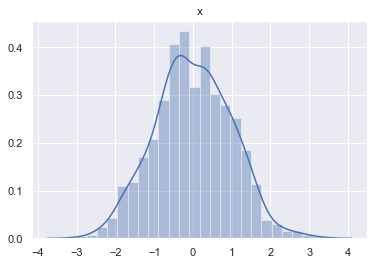

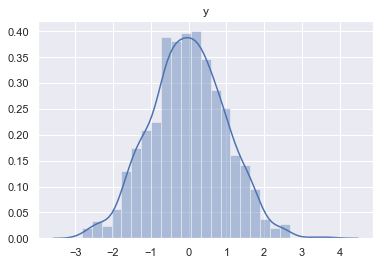

In [21]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

sns.distplot(x)
plt.title('x')
plt.show()
sns.distplot(y)
plt.title('y')
plt.show()


If we want to get the marginal probability of $x$, we need to get the area under the curve of the probability density function along the $y$ axis. You can imagine that we look the 3D plot only from the $y$ axis (or a projection on this axis) and get the area under the curve.

This can be expressed with the following equation:

$$
p(x) = \int p(x, y)dy
$$

and

$$
p(y) = \int p(x, y)dx
$$

# 3.5 Conditional Probability

## Notation

$P(\text{y}=y | \text{x}=x)$ refers to the **conditional probability**: it is the probability that $\text{y}$ takes the specific value $y$ **given that** $\text{x}$ takes the specific value $x$. It is different than $P(\text{y}=y, \text{x}=x)$ because here, $\text{x}$ has already been obtained.

### Example

Let's take again our example of two random variables corresponding to throwing a die ($\text{x}$) and tossing a coin ($\text{y}$). $P(\text{y}=y)$ is the probability that the random variable $\text{y}=y$.

For instance, $P(\text{y}="heads")$ corresponds to the probability of getting "heads". So $P(\text{y}="heads") = 0.5$.

$P(\text{x}=x)$ is the equivalent for the variable $\text{x}$.

$P(\text{y}=y, \text{x}=x)$ corresponds to the joint probability of getting a certain result for both variables. For instance, $P(\text{x}=3, \text{y}="heads")$ is the probability of throwing a die and get 3 and tossing a coin and get "heads". In this example, $P(\text{x}=3, \text{y}="heads")=\frac{1}{12}$.

$P(\text{y}=y | \text{x}=x)$ corresponds to the probability that $\text{y}=y$ given that $\text{x}=x$. This is called a conditional probability. For instance, the $P(\text{y}="heads" | \text{x}=3)$ corresponds to the probability of getting a "heads" given that we have already got a 3 by throwing the die. In this case, the probability is $0.5$. We can note that $P(\text{y}="heads" | \text{x}=3) = P(\text{y}="heads")$ because events are independant. This may not be the case for dependant events. For instance get two cards in a game.

We can calculate conditional probabilities from this formula:

$$
P(\text{y}=y | \text{x}=x) = \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)}
$$

In our example, we have

$$
P(\text{y}="heads" | \text{x}=3) = \frac{P(\text{y}="heads", \text{x}=3)}{P(\text{x}=3)} = \frac{\frac{1}{12}}{\frac{1}{6}} = \frac{6}{12} = 0.5
$$

# 3.6 The Chain Rule of Conditional Probabilities

Following the last equation, we can also calculate the joint probability of two events from the conditional probabilities:

$$
P(\text{y}=y, \text{x}=x) = P(\text{y}=y | \text{x}=x) P(\text{x}=x)
$$

From our last example, we have:

$$
P(\text{y}="heads", \text{x}=3) = P(\text{y}="heads" | \text{x}=3) P(\text{x}=3) = \frac{1}{2} \times \frac{1}{6} = \frac{1}{12}
$$

This use of conditional probabilities can be chained if there are multiple variables:

$$
P(\text{a, b, c}) = P(\text{a|b, c})P(\text{b, c})
$$

and 

$$
P(\text{b, c}) = P(\text{b|c})P(\text{c})
$$

so we have:

$$
P(\text{a, b, c}) = P(\text{a|b, c})P(\text{b|c})P(\text{c})
$$

This can be written:

$$
P(\text{x}^{(1)},...,\text{x}^{(n)}) = P(\text{x}^{(1)}) \prod\limits_{i=2}^{n} P(\text{x}^{(i)} | \text{x}^{(1)},..., \text{x}^{(i-1)})
$$

Let's go into details about this equation. $P(\text{x}^{(1)},...,\text{x}^{(n)})$ corresponds to the joint probability distribution over the $n$ random variables. The symbol $\prod$ is like the symbol $\sum$ but for multiplication. So, we iterate from $2$ to $n$ and multiply the probability of the variable $i$ given the variables from $\text{x}^{(1)}$ to $\text{x}^{(i-1)}$.

https://en.wikipedia.org/wiki/Product_(mathematics)#Product_of_sequences

# 3.7 Independence and Conditional Independence

## Independence

We call two variables dependent if the outcome of one change the probability of the second. Two variables are independant when this is not the case.

The variables $\text{x}$ and $\text{y}$ are independent if their joint probability distribution ($P(\text{x}=x, \text{y}=y)$) can be expressed as the product of their marginal probability distributions.

$$
\forall x \in \text{x}, y \in \text{y}, P(\text{x}=x, \text{y}=y) = P(\text{x}=x)P(\text{y}=y)
$$

### Example

You choose two cards from a deck of 52 cards. If you replace the card before choosing the second card, the probabilities are independent but if you keep it they are dependant because the probabilities are changed with the missing card.

In this example, $\text{x}$ corresponds to the cards from the deck. Let's say that we are interested to the probability to draw an ace ($x$). The second time we take a card is expressed by the random variable $\text{y}$ and we are still interested to the probability to draw an ace ($y$).

If we replace the card after the first drawing, the variables are independent, $P(\text{x}=x) = P(\text{y}=y) = \frac{4}{52} = 0.077$ and $P(\text{x}=x, \text{y}=y) = \frac{4}{52} \times \frac{4}{52} = \frac{16}{2704}$.

However if we don't replace the card, the probability $P(\text{y}=y)$ depends on the result of the first drawing. If we draw an ace in the first drawing, $P(\text{y}=y) = \frac{3}{51} = 0.059$ but if we did not, $P(\text{y}=y) = \frac{4}{51} = 0.078$.

## Conditonal independence

Let's say that we have three events A, B and C and A and B are independent (that is to say knowing A doesn't help you to predict B and knowing B doesn't help you to predict A). We say that A and B are conditionally independent given C if A and B are still independent given C. For a more concrete example, see [here](https://math.stackexchange.com/questions/23093/could-someone-explain-conditional-independence).

$$
\forall x \in \text{x}, y \in \text{y}, z \in \text{z}, P(\text{x}=x, \text{y}=y | \text{z}=z) = P(\text{x}=x | \text{z}=z)P(\text{y}=y | \text{z}=z)
$$

This means that the joint probabilities of the random variables $\text{x}$ and $\text{y}$ ($P(\text{x}=x, \text{y}=y | \text{z}=z)$) given the random variable $\text{z}$ equals the probability that $\text{x}=x$ ($P(\text{x}=x$) given $\text{z}$ times the probability that $\text{y}=y$ ($P(\text{y}=y$) given $\text{z}$.


# 3.8 Expectation, Variance and Covariance


Hang on because this is becoming really interesting and useful :)

## Expectation

Intuitively, the expected value of a random variable is the mean you would expect if you repeat the experiment a lot of times. Let's start with an example.

### Example

We will simulate a die throwing experiment. The result of each throw is 1, 2, 3, 4, 5 or 6. Since the die is good, the distribution is uniform (the probability to get a 1 is the same as a 2 or as any other outcome). What would be the mean value if we throw the die once? And if we throw it 10? And 1000?

First we'll simulate a die throw with the function `randint` from Numpy that can generate random integers.

In [54]:
np.random.seed(123)
obs = np.random.randint(1, 7, 1)
obs.mean()

6.0

I used the function `seed()` to make the experiment reproducible. If I run the cell multiple time the randomness will be always the same if I used the same number as argument (here `123` but it could have been anything). In this case, `randint()` will always return 6.

The function `randint()` takes the lowest value as a first argument (included), the highest value as a second argument (excluded) and the number of observations as a third argument. More details in the [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html).

The goal of this experiment is to gain intuition about the notion of expectation. We want to know the mean of the die trows since the beginning. In this case, we did the experiment only once so the mean is the value we got. The mean of this first experiment is thus 6. But it could have been anything, right? What if we repeat the experiment 10 times.

In [17]:
np.random.seed(123)
obs = np.random.randint(1, 7, 10)
obs.mean()

3.4

I created a vector `obs` containing 10 random integers between 1 and 6 (included). I calculated the mean of the vector to know the mean of the outcomes of all die throws.

This is interesting. Let's do it 1000 times.

In [18]:
np.random.seed(123)
obs = np.random.randint(1, 7, 1000)
obs.mean()

3.481

And more!

In [55]:
np.random.seed(123)
obs = np.random.randint(1, 7, 100000)
obs.mean()

3.49939

🤔It seems that the mean is closer and closer from 3.5.

Now we will plot the means that we obtain in function of the number of observations. What do you expect?

In [60]:
np.random.seed(123)

num_obs = 10000
all_obs = np.zeros(num_obs)
all_means = np.zeros(num_obs - 1)
for i in range(num_obs - 1):
    obs = np.random.randint(1, 7)
    all_obs[i] = obs
    all_means[i] = all_obs[:i+1].mean()
all_means

array([6.        , 4.5       , 4.66666667, ..., 3.48704611, 3.48689738,
       3.48664866])

I created a vector `all_obs` filled with 0 (size `num_obs`). For each die throw, I generated a random integer and placed it in this vector. I also created a vector `all_means` filled with 0. It contains the mean of `all_obs` from 0 to the current value. For instance, the second value of `all_means` contains the mean of `all_obs` from 0 to 2.

Now, let's plot this vector.

(1, 6)

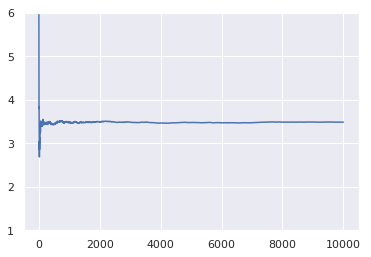

In [61]:
plt.plot(all_means)
plt.ylim(1, 6)

We can see that the mean ends around 3.5. Actually this is only the mean of all possible outcomes since the distribution is uniform:

In [35]:
(1 + 2 + 3 + 4 + 5 + 6) / 6

3.5

This is the **expected value**!

We can also see that 2000 values seems enough to have a good approximation of the expected value. Let's zoom in the beginning.

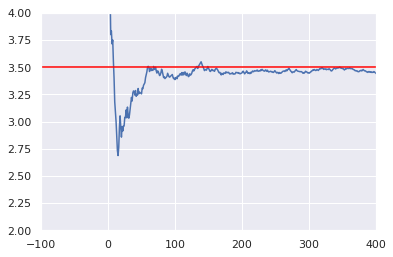

In [53]:
plt.plot(all_means)
plt.ylim(2, 4)
plt.xlim(-100, 400)
plt.axhline(3.5, c='red')

I also represented the average as a horizontal red line. We can see that the mean is closer and closer to the expected value when we add observations.

I hope that now the concept of expectation and expected value is clearer!

From a more formal point of view, the **expected value** of a function $f(x)$ is the average of the values taken by $f$ when $x$ is drawn from the distribution $P$. When the variable $x$ is discrete (like our last example), the expected value is a weighted sum of the possible values of $x$.


$$
\mathbb{E}_{x\sim P}[f(x)] = \sum_x P(x)f(x)
$$

Let's get into this. $\mathbb{E}$ is the expectation. $x\sim P$ means that $x$ is drawn from the distribution $p$. So $\mathbb{E}_{x\sim P}[f(x)]$ is the expectation of $f(x)$ when $x$ is drawn from $P$. $\sum_x P(x)f(x)$ is the sum for every $x$ of the product between the value $f(x)$ and the probability it occurs $P(x)$.

In our previous dice experiment, $x$ can take the values 1, 2, 3, 4, 5, or 6. Since the probability is uniform, we have:

$$
P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = \frac{1}{6}
$$

$f(x)$ is the value corresponding to the outcome $x$. In our example, we arbitrarly associate each dice outcome to its own value (getting a 1 gives the value 1, getting a 2 gives the value 2 and so on).

Still in our previous example, we have the following expectation:

$$
\begin{align*}
\mathbb{E}_{x\sim P}[f(x)] &= P(1)f(1) + P(2)f(2) + P(3)f(3) + P(4)f(4) + P(5)f(5) + P(6)f(6)\\\\
&=
\frac{1}{6} \times 1 + \frac{1}{6} \times 2 + \frac{1}{6} \times 3 + \frac{1}{6} \times 4 + \frac{1}{6} \times 5 + \frac{1}{6} \times 6
\end{align*}
$$

In [63]:
(1/6) * 1 + (1/6) * 2 + (1/6) * 3 + (1/6) * 4 + (1/6) * 5 + (1/6) * 6

3.5

We can note that we could have been associate different value for each outcome. Let's take another example.

### Example

Let's say that we can win or loose some money depending of the dice outcome. We'll calculate the expectation to see if we want to play this game. Here are the rules:

- For a 1 or a 6 you win \$5.
- For a 2 you win \$10.
- For a 3 you loose \$50.
- For a 4 you win \$20.
- For a 5 you win \$0.

Let's calculate the expectation:

$$
\begin{align*}
\mathbb{E}_{x\sim P}[f(x)] &= P(1)f(1) + P(2)f(2) + P(3)f(3) + P(4)f(4) + P(5)f(5) + P(6)f(6)\\\\
&=
\frac{1}{6} \times 5 + \frac{1}{6} \times 10 + \frac{1}{6} \times -50 + \frac{1}{6} \times 20 + \frac{1}{6} \times 0 + \frac{1}{6} \times 5\\\\
&\approx -1.66
\end{align*}
$$

In [64]:
(1/6) * 5 + (1/6) * 10 + (1/6) * -50 + (1/6) * 20 + (1/6) * 0 + (1/6) * 5

-1.6666666666666659

This means that we'll lose \$1.67 in average at each throw.

### Continuous variables

We have seen how to calculate the expectation for the case of discrete variable, that is to say, when $x$ can take a limited number of discrete values (for instance, one of the 6 faces of a dice).

For continuous variable, the calculation of the expectation is a bit different. We have seen earlier that the probabiliy of a continuous variable taking a specific value is not very useful: the probability is infinitly small because the number of possible value on a continuous scale is $+\infty$ so the probability is $\frac{1}{+\infty} \approx 0$. It is more useful to talk about the probability to get a value in a certain range.

In the case of continuous variable, the expectation is calculated as follow:

$$
\mathbb{E}_{x\sim P}[f(x)] = \int p(x)f(x)dx
$$

Here again, $f(x)$ is a function binding the random variable $x$ and the value of the outcome. Let's take an example to be sure that it's crystal clear:

### Example

For instance, let's say that a machine creates a random number between 0 and 10.

In [17]:
np.random.seed(123)
np.random.uniform(0, 10)

6.964691855978616

In addition, the function $f(x)$ describes the link between the outcome (the float number between 0 and 10) and the value that we get when this outcome is drawn. In this example, let's say that it is:

$$
f(x) = 2x
$$

We draw the number $6.964691855978616$, this means that the value we got is:

$$
2 \times 6.964691855978616 = 13.929383711957232
$$

Let's continue with our expectation:

$$
\mathbb{E}_{x\sim P}[f(x)] = \int p(x)f(x)dx
$$

$p(x)$ is the probability distribution of the random variable $x$.

The expectation is thus the area under the curve of the product of $p(x)$ and $f(x)$.

### Example

- $f(x) = x$. This means that the value is equal to the outcome of the random variable $x$.
- The random variable $x$ is defined between 2 and 4.
- The probability density function of $x$ is defined as $p(x) = x^2$. This means that there is a lot of chances that we draw a high value in comparison to a small value.

The expectation is:

$$
\mathbb{E}_{x\sim P}[f(x)] = \int_2^4 x^2xdx = \int_2^4 x^3dx = \frac{x^4}{4} + c
$$

### Expectations are linear

If we sum the expected value of a random variable $x$ with the expected value of random variable $y$ we obtain the expected value of the sum of $x$ and $y$.

$$
\mathbb{E}_x[f(x) + g(x)] = \mathbb{E}_x[f(x)] + \mathbb{E}_x[g(x)]
$$

As well we have:

$$
\mathbb{E}_x[\alpha f(x) + \beta g(x)] = \alpha \mathbb{E}_x[f(x)] + \beta \mathbb{E}_x[g(x)]
$$

If $\alpha$ and $\beta$ are not dependant on $x$.

## Variance

The variance of a random variable tells how the values spread around the expected value. It is expressed as:

$$
Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]
$$

Some explanations:

- $(f(x) - \mathbb{E}[f(x)])$ is the deviation between the observed value and the mean of the random variable (the expected value).

- This means that the variance is the expectation of this squared deviation.

- A low variance means that the values of $f(x)$ will be near the average.

- The standard deviation is the square root of the variance.


## Covariance

<img src="images/negative-and-positive-covariance.png" width="600" alt="Representation of positive and negative covariance between variables x and y" title="Positive and negative covariances.">
<em>Positive and negative covariance between two variables $x$ and $y$.</em>

The covariance between two random variables tells if their values are linearly related to each other. It is a measure of their joint variability.

A high positive covariance means that high values from a variable $x$ are associated with high values of another variable $y$ and low values from $x$ are associated with low values from $y$.

A high negative covariance means that high values from $x$ are associated with low values from $y$ and the other way around.

A low covariance means that the variables are not so much related.


$$
Cov(f(x), g(x)) = \mathbb{E}[ (f(x) - \mathbb{E}[f(x)]) (g(y) - \mathbb{E}[g(y)]) ]
$$

Let's split this equation:

- Mainly, the covariance is the expectation of the product of:
    - $(f(x) - \mathbb{E}[f(x)])$: as we have seen earlier, this is the deviation between the value of the random variable and the expected value.
    - $(g(y) - \mathbb{E}[g(y)])$: this is the same thing but with the random variable $y$.

### Notes

The **correlation** between two variables is similar to the covariance but with a normalisation of the variables.

Covariance is a distinct concept than independency because independency needs no linear and no non-linear relation between the variables

### Covariance matrix

The covariance matrix is a matrix containing the variances of variables and their covariances.


## Variance and covariance details

If you want more details about variance and covariance, which are very important concept inside and outside the field of probabiliy, you can check another of my blog post here:

[https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/](https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/).

# 3.9 Common probability distributions


The aim of this chapter is to cover some common probability distributions that we may encounter a lot in data science, machine learning, deep learning.

But first, what is a probability distribution? It is a function that describe the probability of occurrence of all possible outcomes of a variable.


## 3.9.1 Bernoulli distribution

The Bernoulli distribution is a **discrete probability distribution** describing the probability of the outcomes of a binary variable (a variable that can take only two different values). So it is only the probability of each of these two possible outcomes.

### Example

Let's start straight away with an example.

You want to get your driving license. The outcome is either positive and you can legally drive either negative and you should wait to get a car. Let's say that it is $0$ if you fail and $1$ if you succeed.

The Bernoulli distribution is the description of the probability of failure and the probability of success. For exemple, let's say that the probability of sucess is $0.7$ and the probability of failure is $0.3$. The probability distribution will have the following shape:

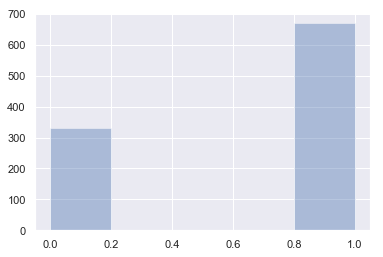

In [43]:
sucess = np.random.binomial(n=1, p=0.7, size=1000)

sns.distplot(sucess, kde=False)


Let's see what I have done here.

I created a random variable which values are drawn from a binomial distribution (thanks to the Numpy function `random.binomial()`). We'll see later that the Bernoulli distribution is a special case of a binomial function. Here it is a Bernoulli distribution because I set the parameter `n` to $1$ (cf. later).

The second parameter is the probability. We said that we have 70% chance to pass the exam and get the driving license so I set it to $0.7$.

The last parameter is the number of times we did the experiment (hope you don't have to do the test 1000 times).

Then I plotted the results with the library `Seaborn`. The function `distplot` takes the random variable as the first parameter. The second one is only to avoid to plot a gaussian kernel density estimate on the top of the plot.

We can see that we have around 700 of success and 300 of failure.

This is the **representation of a Bernoulli distribution**.

**Notes**: we studied here a common probability distribution: Bernoulli. We can consider that it is a category of distributions different according to the parameter we use. Here the only parameter is the probability of success but we'll see that some distribution can take several parameters.

So now that we have a certain intuition about the Bernoulli distribution, we can be a bit more formal. This distribution is a function which output is binary. We'll call the probability of one possible outcome $p$ and the other $q$. The Bernoulli distribution says that $q = p - 1$.

In our preceeding example, $p=0.7$ and thus $q=1-0.7=0.3$.


## Binomial distribution

The Bernoulli distribution is a special case of the binomial distribution so it worth saying a word about it.

The binomial distribution is the probability distribution that describes the probability to get a specific combination of events in Bernoulli experiment (so with two possible outcomes).

### Example

This time, we'll consider another coin flipping experiment. If the experiment is made from one flip, the probabilities can be describe by a Bernoulli distribution as we saw above. But if we repeat it multiple times and ask for instance, what is the probability to get exactly 3 heads in 10 flips?

To do it we'll see the formula used to compute the binomial distribution:

$$
P(N) = \frac{n!}{(n-N)! N!} p^N (1-p)^{n-N}
$$

with:

- $p$ is the probability to get one of the two outcomes that we'll call 'success' (in our last exemple, 'success' is associated with heads: $p=0.5$)
- $n$ is the number of trial (in our last example: 10 trials)
- $N$ is the total number of successes (in our last exemple: 3 succcesses)
- $n!$ is pronounced 'n factorial' and means that we multiply $n$ with $n-1$ with $n-2$... until that $n=1$. For instance $5!=5\times4\times3\times2\times1$. More details [here](https://en.wikipedia.org/wiki/Factorial)

The first part

$$
P(N) = \frac{n!}{(n-N)! N!}
$$

corresponds to the number of possible combinations. In the preceding example, we wanted to know the probability to get 3 heads in 10 flips. However there are a lot of different ways to get these 3 heads. For instance if we write the series of heads and tails we can have HHHTTTTTTT or HTHHTTTTTT etc.

This first part is multiplied with the probability to have 3 heads in 10 flips in a specific order given by:

$$
p^N (1-p)^{n-N}
$$

In the case of a head flipping experiment, the probability is 0.5 for both outcomes and since we want a specific result at each flip, the probability is $0.5^n$.

Let's calculate it for our example:

$$
\begin{align*}
P(3) &= \frac{10!}{(10 - 3)!\times3!} \times 0.5^{3} \times (1-0.5)^{10 - 3}\\\\
&=\frac{10\times9\times8\times7\times6\times5\times4\times3\times2}{ 7\times6\times5\times4\times3\times2 \times3\times2} \times 0.5^{3} \times 0.5^7
\end{align*}
$$

To have an idea let's calculate this probability.

In [63]:
(10*9*8)/(3*2) * 0.5**3 * 0.5**7

0.1171875

There is around 10% chance to get exactly 3 heads in 10 flips.

### Example

To get a better intuition, let's see what we have if the experiment is made only with 2 flips. Let's say that we want to calculate the probability to get exactly 1 heads:

$$
\begin{align*}
P(1) &= \frac{2!}{(2 - 1)!\times1!} \times 0.5^{1} \times (1-0.5)^{2 - 1}\\\\
&=\frac{2}{ 1 \times 1} \times 0.5^{1} \times 0.5^1
\end{align*}
$$

In [64]:
2 * 0.5**1 * 0.5

0.5

### Binomial distribution with Numpy

We saw above how to use Numpy to draw samples from a bernoulli distribution:

`np.random.binomial(n=1, p=0.7, size=1000)`

We said that the Bernoulli distribution is a special case of the Binomial distribution where the number of trials ($N$) is equal to 1.

We'll now use the same function to create binomial distributions.

### Example

We'll implement the example 13. Each experiment corresponds to 10 flips ($n=10$) and we said that a success is when we get a heads. The probability of success is thus $p=0.5$.

In [74]:
np.random.seed(123)
successes = np.random.binomial(n=10, p=0.5, size=100)
successes

array([6, 4, 4, 5, 6, 5, 8, 6, 5, 5, 4, 6, 5, 3, 5, 6, 4, 4, 5, 5, 6, 7,
       6, 5, 6, 4, 4, 4, 4, 6, 3, 5, 5, 5, 5, 4, 5, 7, 7, 5, 6, 3, 4, 5,
       7, 4, 5, 8, 5, 5, 3, 6, 5, 5, 4, 4, 5, 6, 7, 5, 6, 5, 6, 6, 7, 3,
       6, 4, 4, 5, 3, 7, 6, 6, 2, 5, 5, 3, 3, 6, 4, 6, 5, 5, 7, 7, 4, 2,
       4, 5, 6, 9, 4, 6, 5, 6, 3, 5, 4, 4])

The result returned by the function corresponds for each trial (here 100) to the number of 'successes'. For instance, in the first trial, there were 6 successes over the 10 flips.

Let's plot this to see what it looks like!

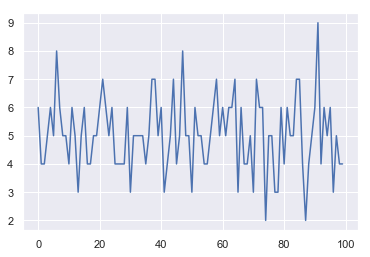

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(successes)

We can see that the values are centered around 5 which means that in average we get 5 heads on 10 trials. It makes sense because this is 50% of the trial and $p=0.5$.

#### Parameters

We now have all the tools to look at how the Bernoulli distribution is expressed in the book. It says that the Bernoulli distribution gives the probabilities that a binary random variable takes the value 0 or 1.

Only one parameter control this distribution: $\phi \in [0, 1]$ ($\phi$ is letter called *phi* and takes the value 0 or 1)  that gives the probability that the variable take the value 1.

The properies of this distribution are:

$$
P(\text{x}=1) = \phi
$$

As we said, $\phi$ is the probability to get a 1.

$$
P(\text{x}=0) = 1 - \phi
$$

Since the variable is binary and the total of probabilities is 1, the probability to get 0 is 1 minus the probability to get 1.

More generally we have:

$$
P(\text{x}=x) = \phi^x(1 - \phi)^{1-x}
$$

Since $\phi$ is equal either to 0 or 1 we have:

$$
P(\text{x}=0) = \phi^0(1 - \phi)^{1-0} = 1 - \phi
$$

and

$$
P(\text{x}=1) = \phi^1(1 - \phi)^{1-1} = \phi
$$

#### Expectation

The expectation of a random variable $\text{x}$ drawn from a Bernoulli distribution is:

$$
\mathbb{E}_{\text{x}}[\text{x}] = \phi
$$

Remind that the expected value is calculated with the following formula (cf. above):

$$
\mathbb{E}_{x\sim P}[f(x)] = \sum_x P(x)f(x)
$$

In the case of the Bernoulli variable, we have

$$
\mathbb{E}_{\text{x}}[\text{x}] = P(\text{x}=0)f(0) + P(\text{x}=1)f(1)
$$

And we saw that:

$$
P(\text{x}=1) = \phi
$$

and

$$
P(\text{x}=0) = 1 - \phi
$$

We thus have:

$$
\mathbb{E}_{\text{x}}[\text{x}] =(1 - \phi) \times 0 + \phi \times 1 = \phi
$$

#### Variance

The variance of a Bernoulli variable is


$$
Var_{\text{x}}(\text{x}) = \phi (1 - \phi)
$$

We saw earlier that the formula of the variance is:

$$
Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]
$$

This can be expanded like that ([here](https://en.wikipedia.org/wiki/Variance)). First we can develop from $(a - b)^2 = a^2 - 2ab + b^2$:

$$
\begin{align*}
Var(f(x)) &= \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]\\\\
&= \mathbb{E}[f(x)^2 - 2f(x)\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2]\\\\
&= \mathbb{E}[f(x)^2] - 2\mathbb{E}[f(x)]\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2\\\\
&= \mathbb{E}[f(x)^2] - 2\mathbb{E}[f(x)]^2 + \mathbb{E}[f(x)]^2\\\\
&= \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2
\end{align*}
$$

We saw that $\mathbb{E}_{\text{x}}[\text{x}] = \phi$ so $\mathbb{E}_{\text{x}}[\text{x}]^2 = \phi^2$. However, we still have to calculate $\mathbb{E}_{\text{x}}[\text{x}^2]$:

$$
\begin{align*}
\mathbb{E}[x^2] &= \sum_x P(\text{x}=x)x^2\\\\
&= P(\text{x}=0)\times 0^2 + P(\text{x}=1)\times 1^2\\\\
\end{align*}
$$

Again, we know that $P(\text{x}=1) = \phi$ and $P(\text{x}=0) = 1 - \phi$. So by replacing in the last equation we have:

$$
\begin{align*}
\mathbb{E}[x^2] = (1 - \phi)\times 0^2 + \phi \times 1^2 = \phi
\end{align*}
$$

Now that we have calculated $\mathbb{E}[x^2]$ we can replace these terms in the variance formula:

$$
\begin{align*}
Var(f(x)) &= \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2\\\\
&= \phi - \phi^2\\\\
&= \phi(1 - \phi)
\end{align*}
$$

# References

Nykamp DQ, “The idea of a probability density function.” From Math Insight. http://mathinsight.org/probability_density_function_idea

[2] https://www.mathsisfun.com/calculus/integration-introduction.html

https://www.mathsisfun.com/calculus/derivatives-introduction.html

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html



https://math.stackexchange.com/questions/23093/could-someone-explain-conditional-independence

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html

https://en.wikipedia.org/wiki/Factorial

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html